# Machine Learning Project: Passanger Satisfaction
### Bence Szabo

My goal is to predict whether the passengers were satisfied with their travel taking in account as much of the available data as there are while being fully consistent the relationship between human needs and the underlying factors that drive satisfaction and dissatisfaction within the context of air travel, such as minimizing negative experiences (delays, poor service) and maximizing positive ones (comfort, convenience, and value)

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import kagglehub

import numpy as np

from sklearn.linear_model import LogisticRegression

# Download latest version
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")

print("Path to dataset files:", path)

df_train = pd.read_csv(f"{path}/train.csv")
df_test = pd.read_csv(f"{path}/test.csv")

/home/codespace/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/teejmahal20/airline-passenger-satisfaction/versions/1


In [2]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


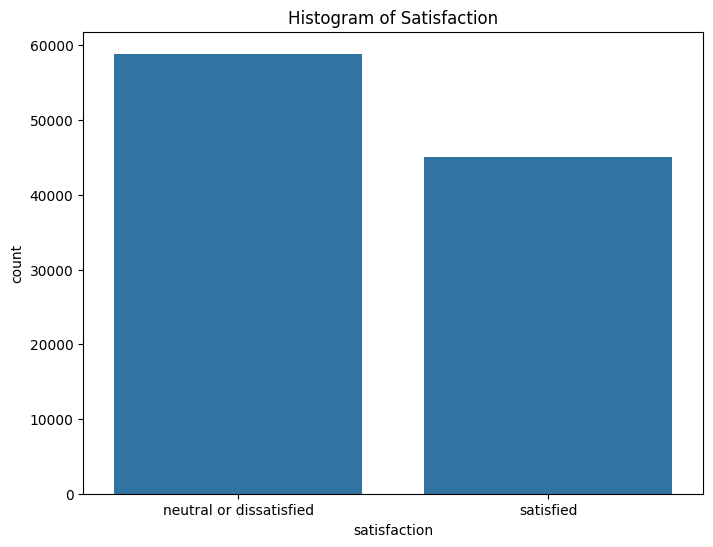

In [3]:
# Histogram of satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='satisfaction')
plt.title('Histogram of Satisfaction')
plt.show()

Seems like the passangers are not truly satisfied with their booked flights, therefore this company indeed needs a helping a hand solving this problem!

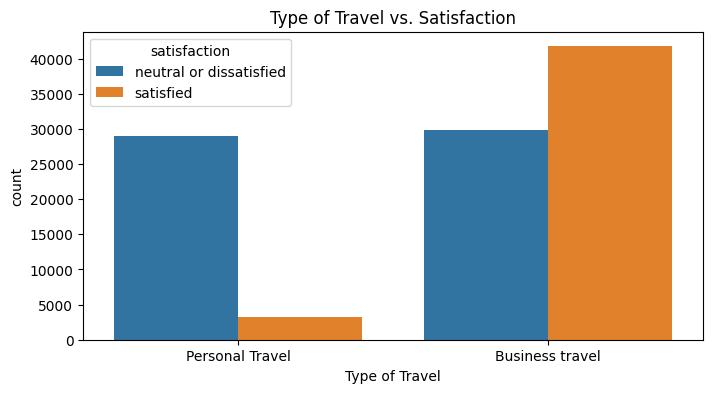

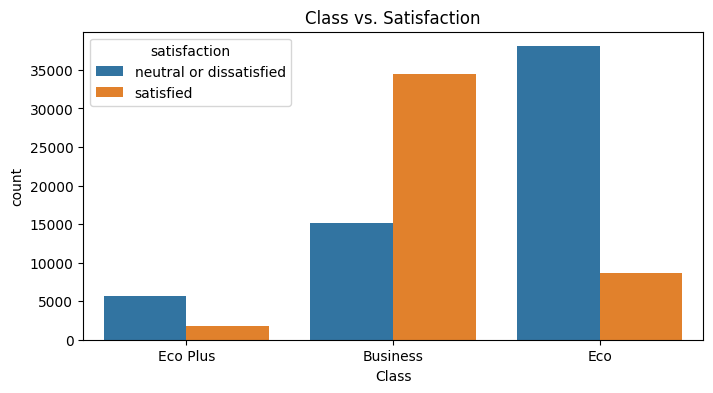

In [4]:
# Travel Details vs. Satisfaction
plt.figure(figsize=(8, 4))
sns.countplot(data=df_train, x='Type of Travel', hue='satisfaction')
plt.title('Type of Travel vs. Satisfaction')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df_train, x='Class', hue='satisfaction')
plt.title('Class vs. Satisfaction')
plt.show()



Business Travel: Passengers traveling for business are overwhelmingly satisfied. The satisfied (orange) count (over 41,000) is significantly higher than the neutral or dissatisfied (blue) count (approx. 30,000). I suppose this is because they travel moe frequently and they are less sensitive to the prices of ticket, as its probably covered by their company.

Personal Travel: Passengers traveling for personal reasons are overwhelmingly neutral or dissatisfied. The neutral or dissatisfied (blue) count (approx. 29,000) is about 8-9 times the satisfied (orange) count (approx. 3,500). As these passangers are those who are truly paying for those tickets, they can take really seriously the service.


Business Class: This class is the most satisfying. The count of satisfied (orange) passengers (approx. 34,500) is more than double the count of neutral or dissatisfied (blue) passengers (approx. 15,000).

Eco Class: This class is the least satisfying. The count of neutral or dissatisfied (blue) passengers (approx. 37,000) is over four times the count of satisfied (orange) passengers (approx. 8,500).

Eco Plus: This class has low total passenger volume, but the ratio is heavily skewed towards neutral or dissatisfied (blue) (approx. 5,500) over satisfied (orange) (approx. 1,500). This is a point of potential improvement!

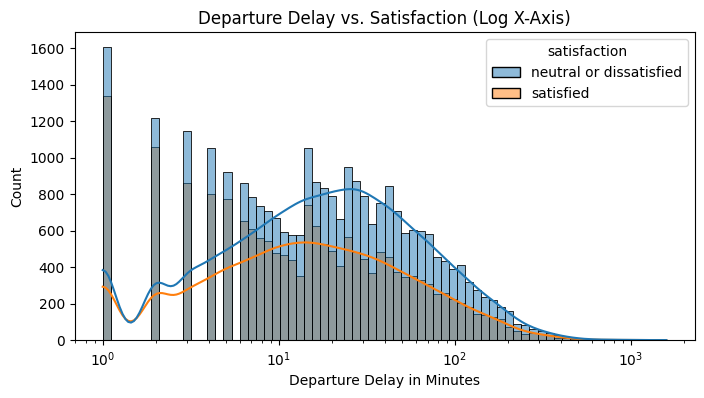

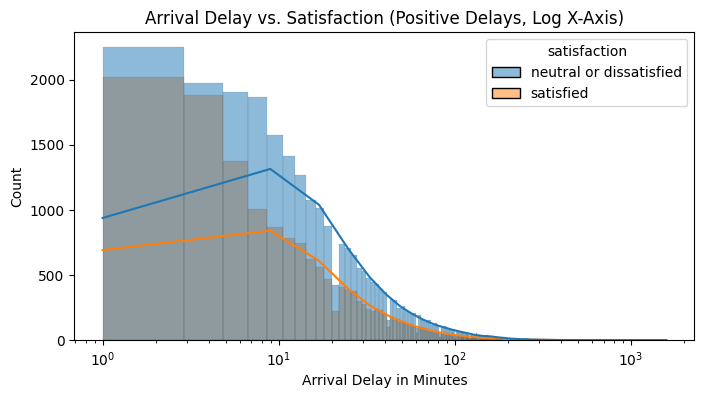

In [5]:
# Operational Metrics vs. Satisfaction
df_positive_delay_departure = df_train[df_train['Departure Delay in Minutes'] > 0]

plt.figure(figsize=(8, 4))
plt.xscale('log')  # Set the x-axis to a logarithmic scale
sns.histplot(data=df_positive_delay_departure, x='Departure Delay in Minutes', hue='satisfaction', kde=True)
plt.title('Departure Delay vs. Satisfaction (Log X-Axis)')
plt.show()

df_positive_delay_arrival = df_train[df_train['Arrival Delay in Minutes'] > 0]

plt.figure(figsize=(8, 4))
# Now plot only the positive delays on a log scale
sns.histplot(data=df_positive_delay_arrival, x='Arrival Delay in Minutes', hue='satisfaction', kde=True)
plt.xscale('log') 
plt.title('Arrival Delay vs. Satisfaction (Positive Delays, Log X-Axis)')
plt.show()



Here it is shown what is expected: the most frequent delay between the 0 to 10 minute range. However, in the case of departuring there are some cases when serious delays are happening frequently, between 10 to 100 minutes - I suppose there are many factors deciding whether a plane can depart or not and it's a different question than the one of landing's. 
What is also clearly present in the graph: minute by minute, the gap between satisfied and unsatisfied travellers grow; following a normalized bell-shape curve where the gap is the biggest where the count of delay is the around the middle of the X-axis.

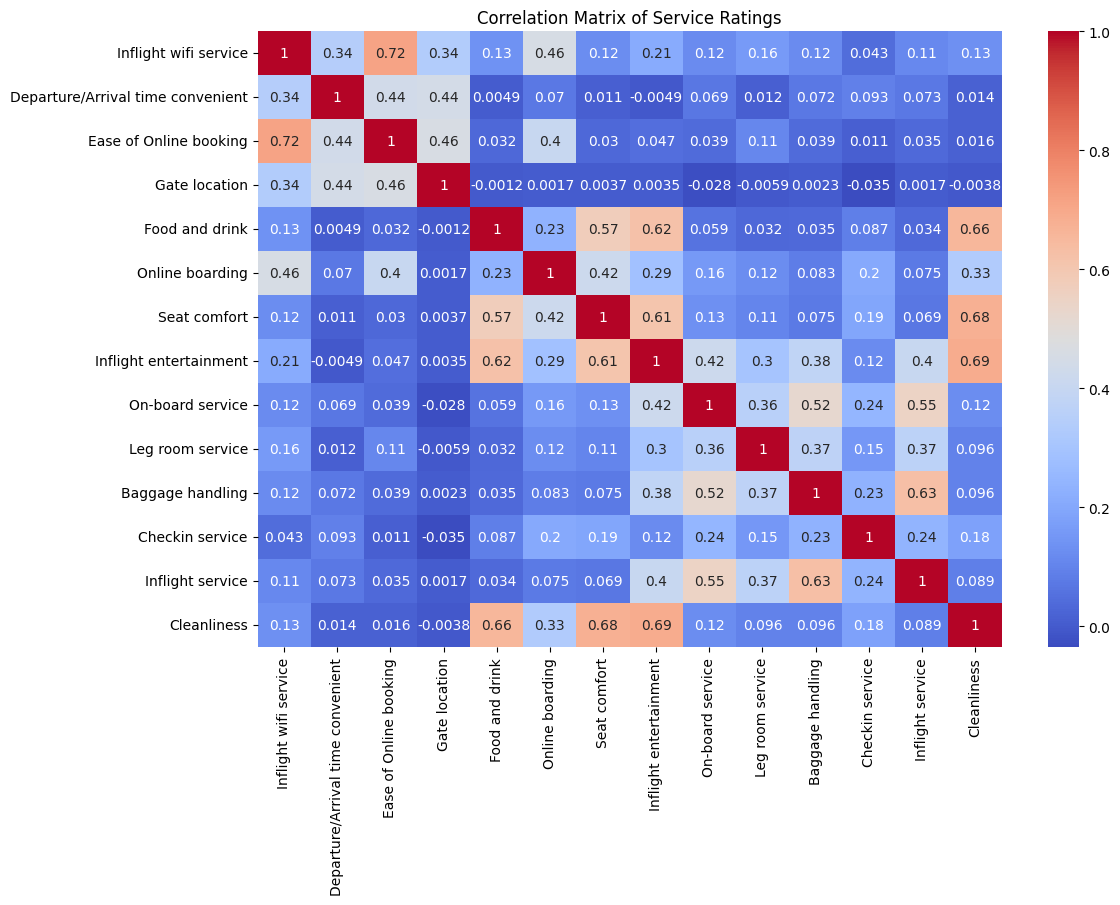

In [7]:
# Service Ratings vs. Satisfaction (Box plots for key ratings)
service_ratings = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
                   'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
                   'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 
                   'Checkin service', 'Inflight service', 'Cleanliness']

# Correlation Matrix for Service Ratings
corr_matrix = df_train[service_ratings].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Service Ratings')
plt.show()

There are some clear correlations! Let's keep only those that have higher absolute value than 0.40!

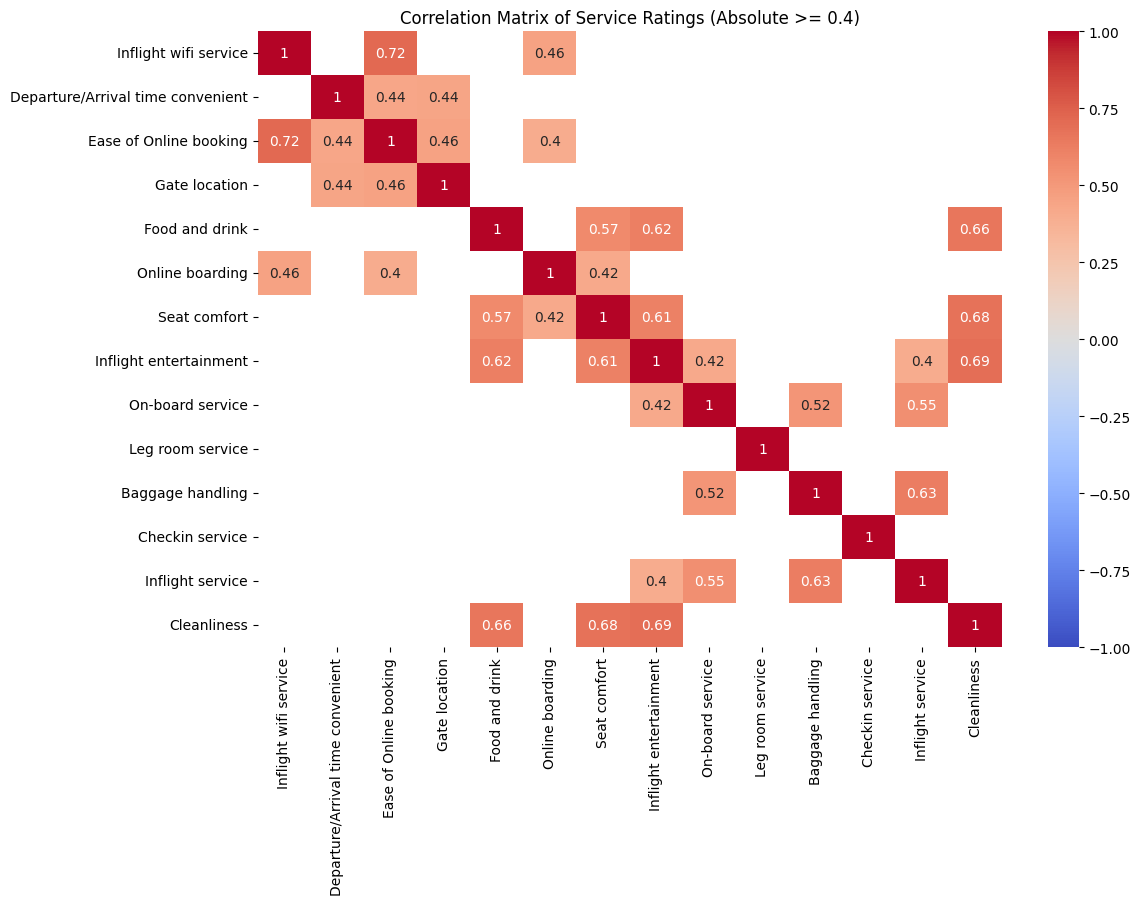

In [8]:
# Create a mask for correlations with absolute value less than 0.4
mask = np.abs(corr_matrix) < 0.4

# Plot the heatmap with the mask
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Service Ratings (Absolute >= 0.4)')
plt.show()

We can observe that some variables are in many cases in a package, such as online activites regarding the flight. None of the variables hit the |0.85| treshold of multicollinearity, so I plan to keep all of it.

Let's see the decisive factors!

Target Imbalance:
satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64


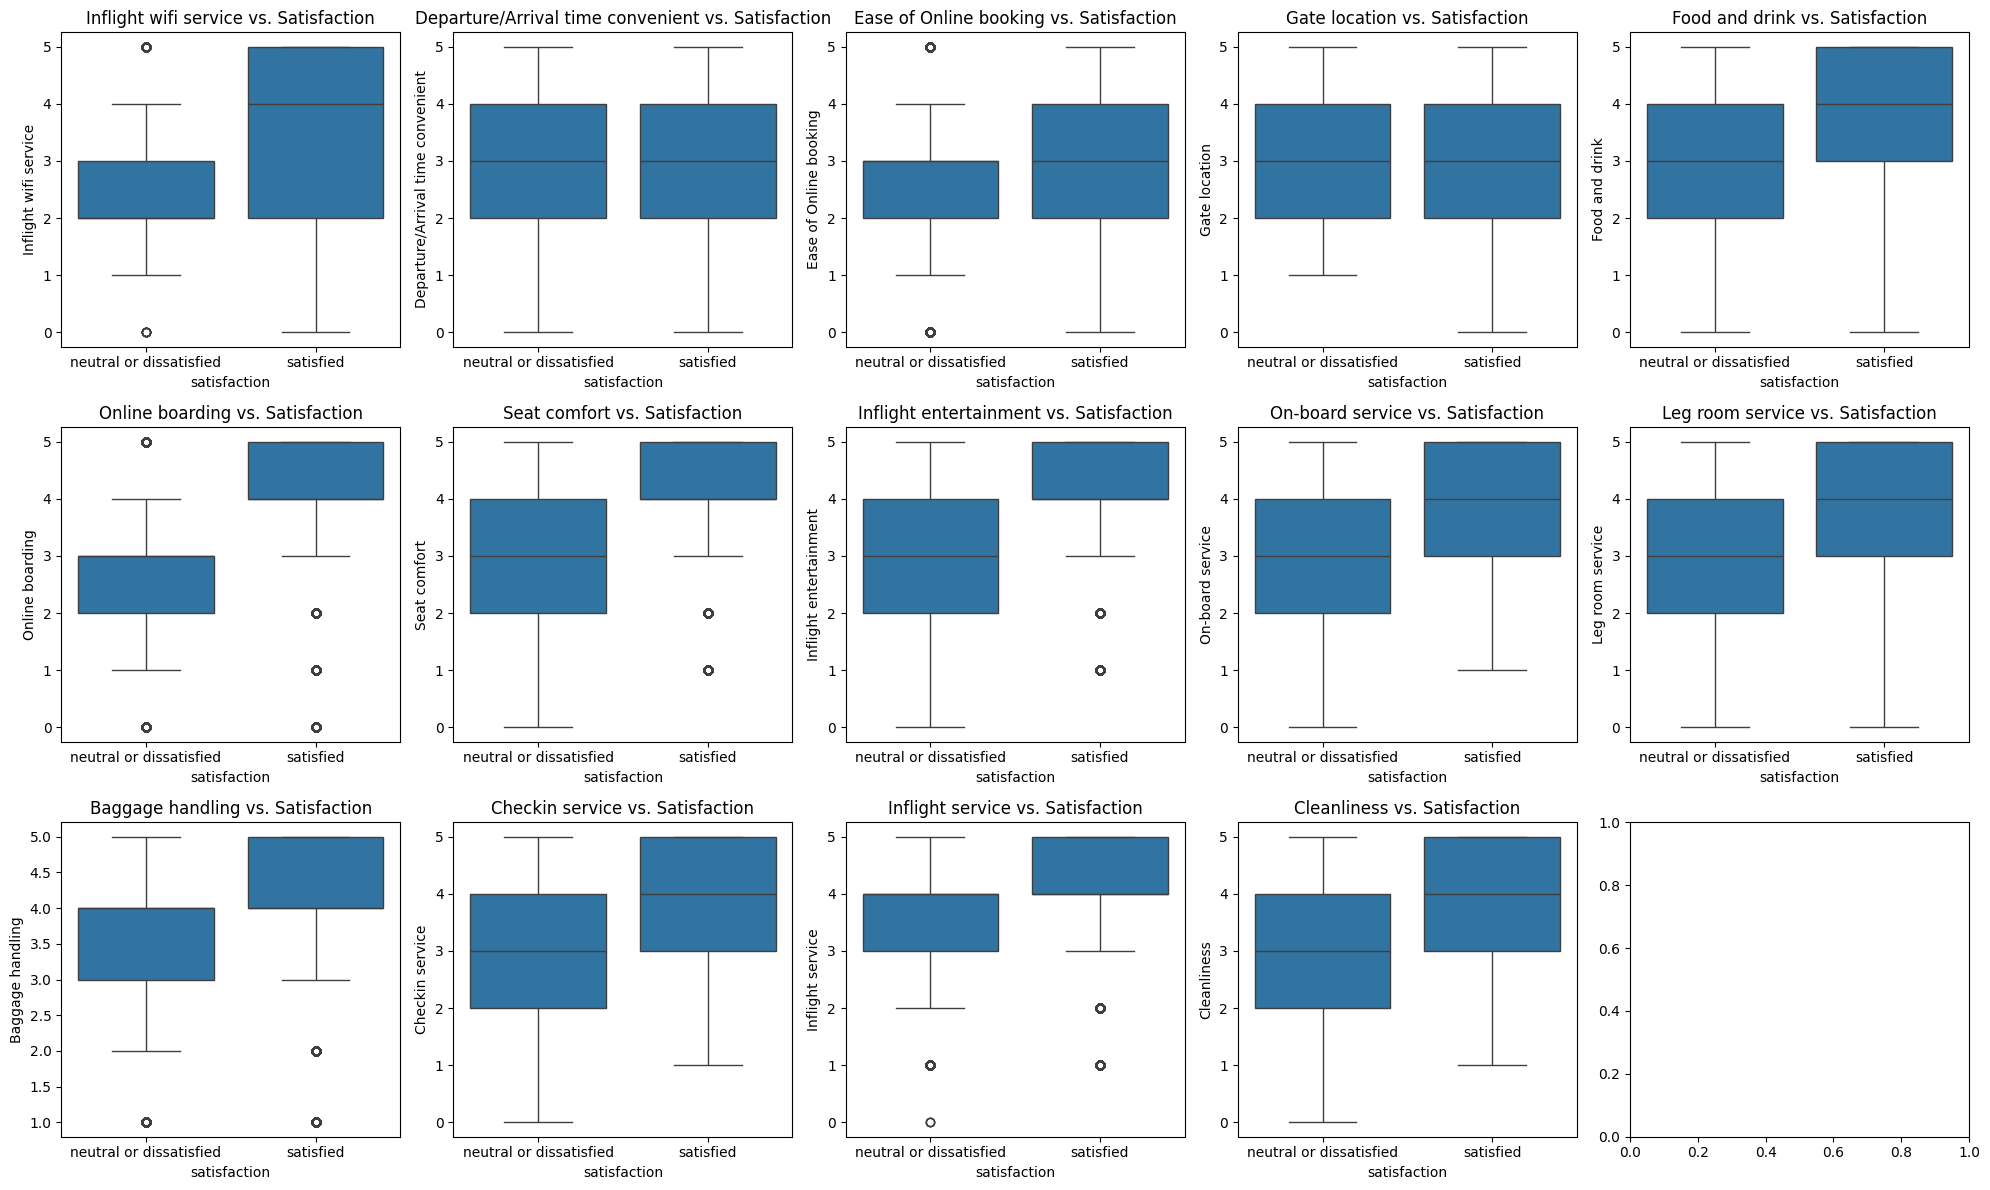

In [9]:
# Target Imbalance Check
print("Target Imbalance:")
print(df_train['satisfaction'].value_counts(normalize=True))



fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
axes = axes.flatten()

for i, rating in enumerate(service_ratings):
    sns.boxplot(data=df_train, x='satisfaction', y=rating, ax=axes[i])
    axes[i].set_title(f'{rating} vs. Satisfaction')

plt.tight_layout()
plt.show()

What makes people satisfied indecisevely is the presence or quality of:
- Departure/Arrivel Time Convenient
- Gate location
- Food and Drink
- On-board Service
- Checkin Service

The rest of the variables show more satisfied passengers - seems like these services are quite alright, not as much room to improve.

In [10]:
# Extract target variable from training set
y_train = df_train['satisfaction']
X_train = df_train.drop('satisfaction', axis=1)
# Remove NA
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]
# Drop irrelevant columns from X_train
X_train = X_train.drop(['Unnamed: 0', 'id'], axis=1)

# Encode target
y_encoded = y_train.map({'satisfied': 1, 'neutral or dissatisfied': 0})

# Same for test
y_test = df_test['satisfaction']
X_test = df_test.drop('satisfaction', axis=1)
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]
X_test = X_test.drop(['Unnamed: 0', 'id'], axis=1)

# Encode test target
y_test_encoded = y_test.map({'satisfied': 1, 'neutral or dissatisfied': 0})

In [11]:
# Get dummies for categorical columns in X_train
categorical_cols = X_train.select_dtypes(include=['object']).columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

# Get dummies for test, ensuring same columns
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align test columns to train columns, fill missing with 0
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Impute missing values with train mean
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

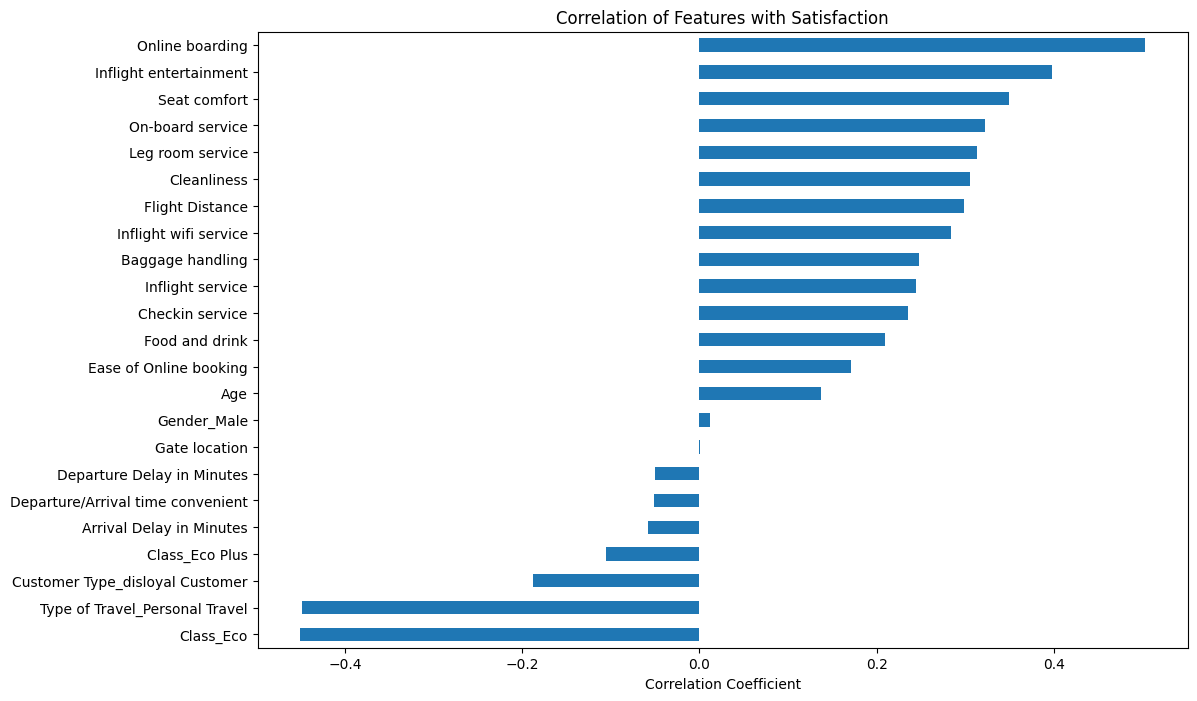

In [12]:
# Include all columns (numerical and dummies)
correlations = X_train.corrwith(y_encoded)

# Plot the correlations as a horizontal bar chart
plt.figure(figsize=(12, 8))
correlations.sort_values().plot(kind='barh')
plt.title('Correlation of Features with Satisfaction')
plt.xlabel('Correlation Coefficient')
plt.show()

Interesting but not surprising insight: The customer and class type have a lot to do with disssatisfaction! Delay is only annoying, but this is hard to avoid.

In [13]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_encoded)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8631


In [14]:
# Code to calculate the score of a dummy classifier
pos_frac = np.sum(y_encoded==1)/len(y_encoded)  # share of the positive class, which typically represents the minority
print('A dummy classifier that always predicts the majority class, achieves classification accuracy equal to {:.2f}%'.format(100*(1-pos_frac)))

A dummy classifier that always predicts the majority class, achieves classification accuracy equal to 56.66%


That looks fabulous! The model can predict a customer's satisfaction with a 80% accuracy!